# Neural Network from Scratch

Based on [cs231](http://cs231n.github.io/) by Stanford

In [52]:
# No Keras! No Pytorch!
# We will use Numpy :))

import numpy as np

In [53]:
import matplotlib
import matplotlib.pyplot as plt
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Define a problem

### 1. Moon data
Generating a dataset

In [54]:
import sklearn.datasets

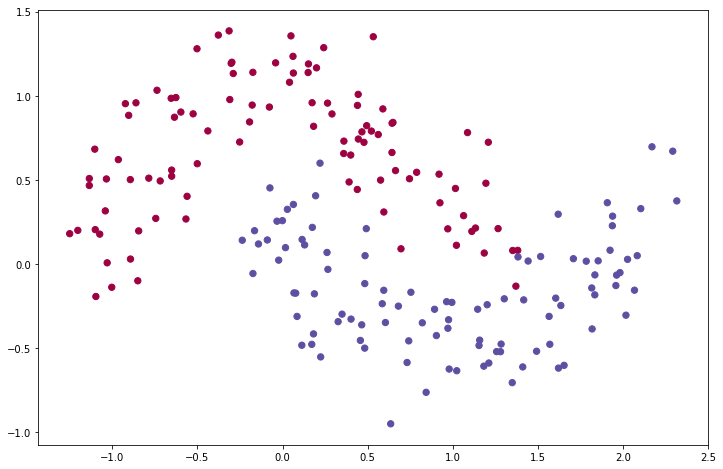

In [55]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, shuffle=False, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [56]:
X.shape, y.shape

((200, 2), (200,))

### 2. Pets classifier

<img src="http://cs231n.github.io/assets/imagemap.jpg" alt="Pets classifier" style="width: 80%"/>

## First attempt: Perceptron

<tr>
    <td> <img src="http://cs231n.github.io/assets/nn1/neuron.png" alt="Biological Neuron" style="width: 100%;"/> </td>
    <td> <img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" alt="Artificial Neuron" style="width: 100%;"/> </td>
</tr>

In [57]:
# Sigmoid function
def activation(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

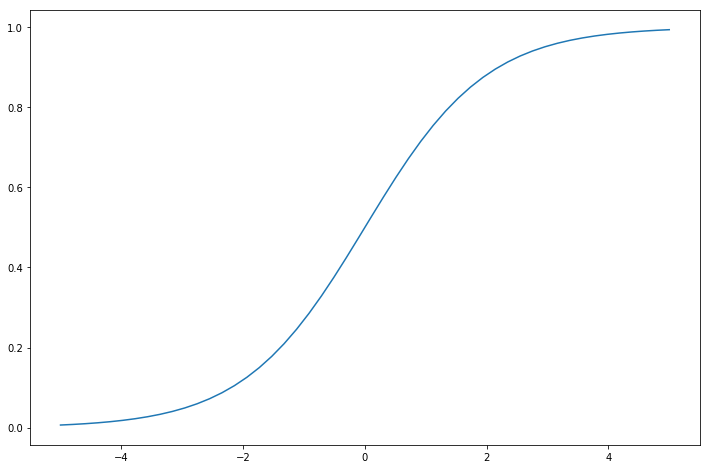

In [58]:
x = np.linspace(-5, 5)
plt.plot(x, activation(x))

In [59]:
# initialize weights randomly with mean 0 - [-1; 1]
w0 = np.random.uniform(-1, 1, size=2)

In [60]:
w0

array([-0.59015263, -0.31660377])

In [61]:
# Change dataset a little bit)
# y[:150] = 0
# X += 10

In [62]:
# plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [63]:
for j in range(501):
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0))
    
    # how much did we miss?
    l1_error = y - l1
    
    if (j % 100) == 0:
        print("Error:" + str(np.mean(np.abs(l1_error))))
#         print("Error:" + str(np.mean(np.abs(l1_error))), 'Weight: ', syn0)
    
    # backpropagation
    l1_delta = l1_error * activation(l1, deriv=True)
    
    # update weights
    w0 += np.dot(l0.T, l1_delta)

Error:0.5359367102556222
Error:0.1938019045064221
Error:0.16483760546955878
Error:0.1977410735564289
Error:0.17666814598075678
Error:0.1702969866890082


In [64]:
# Helper function to predict an output (0 or 1)
def predict(weights, x):
    prob = activation(np.dot(x, weights))
    return prob.round().astype(int)

In [65]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

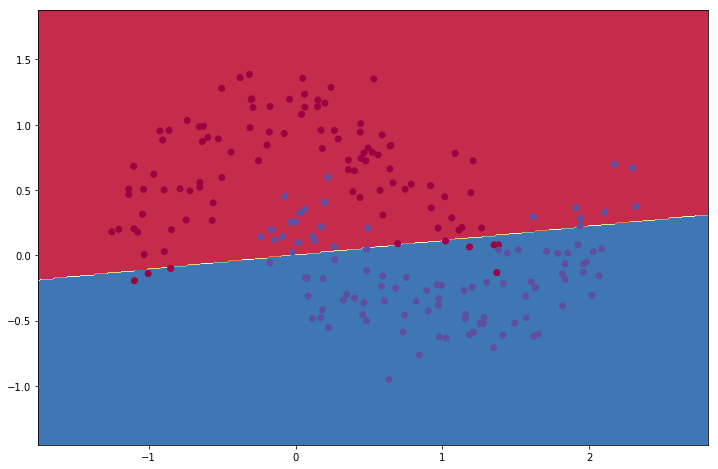

In [66]:
plot_decision_boundary(lambda x: predict(w0, x))

### Add Bias

In [67]:
w0 = np.random.uniform(-1, 1, size=2)
b = 0

In [68]:
for j in range(501):
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0) + b)
    
    # how much did we miss?
    l1_error = y - l1
    
    if (j % 100) == 0:
        print("Error:" + str(np.mean(np.abs(l1_error))))
        print("Error:" + str(np.mean(np.abs(l1_error))), 'Weight: ', w0, b)
    
    # backpropagation
    l1_delta = l1_error * activation(l1, deriv=True)
    
    # update weights
    w0 += np.dot(l0.T, l1_delta)
    b += np.sum(l1_delta, axis=0)


Error:0.5324872602374501
Error:0.5324872602374501 Weight:  [0.35248496 0.75846953] 0
Error:0.25333166866093043
Error:0.25333166866093043 Weight:  [ 6.68761608 -5.53140708] 5.035643985756255
Error:0.16862347186862767
Error:0.16862347186862767 Weight:  [ 1.17542696 -5.58544224] 0.819954322030197
Error:0.16859051104724176
Error:0.16859051104724176 Weight:  [ 1.18274169 -5.57202606] 0.8280182031093797
Error:0.16061347253806965
Error:0.16061347253806965 Weight:  [ 1.33097998 -6.3699527 ] 1.0021762771855236
Error:0.21437932858269407
Error:0.21437932858269407 Weight:  [ 0.6173829  -5.83763149] -0.5445169053930772


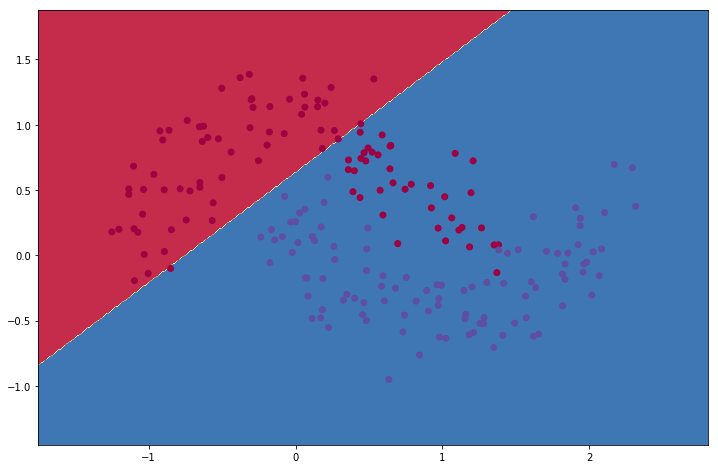

In [69]:
# Helper function to predict an output (0 or 1)
def predict(weights, b, x):
    prob = activation(np.dot(x, weights) + b)
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict(w0, b, x))

### Percepton vs SVM vs Softmax

<img src="http://cs231n.github.io/assets/svmvssoftmax.png" alt="SVM and Softmax" style="width: 80%"/>

Loss for the i-th example:



**SVM**

$L_i = \sum_{j\neq y_i} \max(0, s_j - s_{y_i} + \Delta)$, where $s_j = f(x_i, W)_j$

**Softmax**

$L_i = -\log\left(\frac{e^{f_{y_i}}}{ \sum_j e^{f_j} }\right) \hspace{0.5in} \text{or equivalently} \hspace{0.5in} L_i = -f_{y_i} + \log\sum_j e^{f_j}$

## Optimization

#### Strategy #1 and #2: Random search

In [70]:
w0 = np.random.uniform(-1, 1, size=2)
b = 0

In [71]:
bestloss = 1000000000
bestW = w0
bestB = b

for j in range(151):
    
    # Strategy #1: Random search
    w0 = np.random.randn(2)
    b = np.random.randn()
    
    #Strategy #2: Random Local Search
#     step_size = 1
#     w0 = w0 + np.random.randn(2) * step_size
#     b = b + np.random.randn() * step_size
    
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0) + b)
    
    # how much did we miss?
    l1_error = y - l1
    
    if np.mean(np.abs(l1_error)) < bestloss:
        bestloss = np.mean(np.abs(l1_error))
        bestW = w0
        bestB = b
    
    if (j % 100) == 0:
        print("Error:", bestloss, 'Weight: ', w0, b)
    

Error: 0.41640646808042237 Weight:  [0.81451982 0.05892559] -0.18505367100934153
Error: 0.2516121685307575 Weight:  [ 0.93644573 -0.03509518] 1.265077838088766


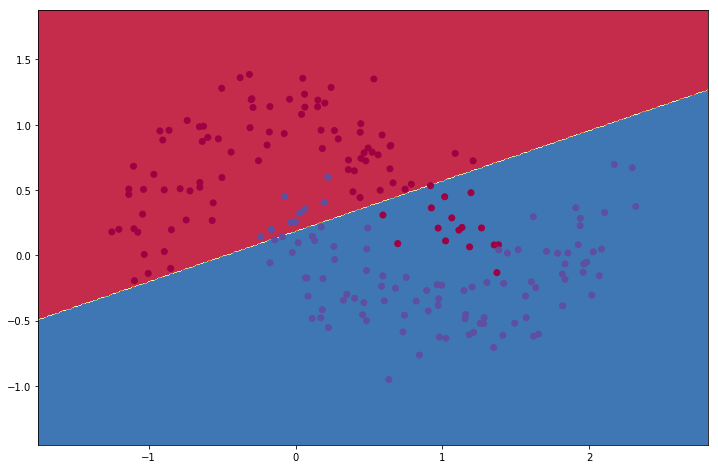

In [72]:
# Helper function to predict an output (0 or 1)
def predict(weights, b, x):
    prob = activation(np.dot(x, weights) + b)
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict(bestW, bestB, x))

### Strategy #3: Following the Gradient

$$\frac{df(x)}{dx} = \lim_{h\ \to 0} \frac{f(x + h) - f(x)}{h}$$

Finite difference approximation:

$$\frac{df(x)}{dx} = \frac{f(x + h) - f(x)}{h} \hspace{0.1in} \text{(bad, do not use)}$$


$$\frac{df(x)}{dx} = \frac{f(x + h) - f(x - h)}{2h} \hspace{0.1in} \text{(use instead)}$$

In [73]:
def loss(w):
    l0 = X
    l1 = activation(np.dot(l0, w))
    
    # how much did we miss?
    l1_error = y - l1
    return np.mean(np.abs(l1_error))

In [74]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 

    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001

    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)

        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension

    return grad

In [75]:
w0 = np.random.uniform(-1, 1, size=2)

In [76]:
df = eval_numerical_gradient(loss, w0)

In [77]:
df

array([-0.09339408,  0.09162018])

In [78]:
w0 = np.random.uniform(-1, 1, size=2)
for j in range(151):
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0)) # hardcode bias
    
    # how much did we miss?
    l1_error = y - l1
    
    if (j % 100) == 0:
        print("Error:", str(np.mean(np.abs(l1_error))), 'Weight: ', w0)
        
    # gradient descent
    df = eval_numerical_gradient(loss, w0)
    step_size = 1 
    w0 = w0 - step_size * df

Error: 0.556647488429183 Weight:  [0.10516267 0.70361717]
Error: 0.18525347606052947 Weight:  [ 1.99489594 -3.69824822]


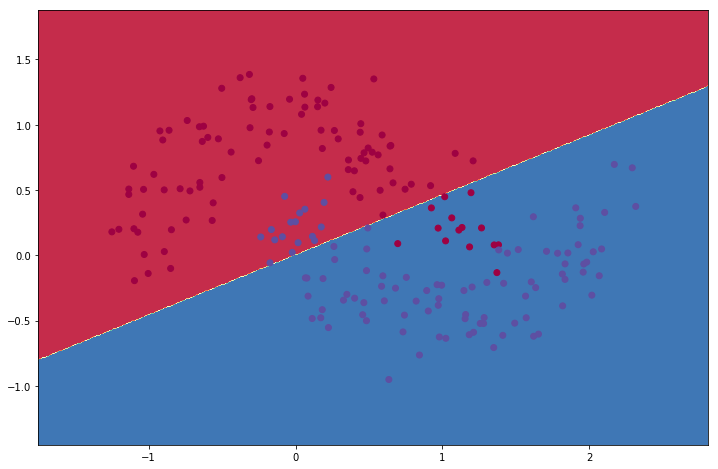

In [79]:
# Helper function to predict an output (0 or 1)
def predict(weights, x):
    prob = activation(np.dot(x, weights))
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict(w0, x))

## Gradient descent

<img src="https://miro.medium.com/max/699/1*mElyetzsTIJrNnKI8kTkCw.jpeg"  alt="Gradient Descent" style="width: 50%"/>

```python
# Vanilla Gradient Descent
while True:
    weights_grad = evaluate_gradient(loss_fun, data, weights)
    weights += - step_size * weights_grad # perform parameter update```
    
    
```python
# Vanilla Minibatch Gradient Descent
while True:
  data_batch = sample_training_data(data, 256) # sample 256 examples
  weights_grad = evaluate_gradient(loss_fun, data_batch, weights)
  weights += - step_size * weights_grad # perform parameter update</pre>```



Effect of **step size**. The gradient tells us the direction in which the function has the steepest rate of increase, but it does not tell us how far along this direction we should step. As we will see later in the course, choosing the step size (also called the learning rate)

<img src="http://cs231n.github.io/assets/stepsize.jpg" alt="step size" style="width: 50%"/>



## Neural Networks and Backpropagation

Define NN:

<img src="https://mlfromscratch.com/content/images/2019/12/neural-networks-3.png" alt="step size" style="width: 40%"/>

$$a^{(l)}=
    \sigma\left(
    \boldsymbol{W}\boldsymbol{a}^{l-1}+\boldsymbol{b}
    \right)$$
    
    
$$\sigma \left(
    \begin{bmatrix}
    w_{0,0} & w_{0,1} & \cdots & w_{0,k}\\
    w_{1,0} & w_{1,1} & \cdots & w_{1,k}\\
    \vdots & \vdots & \ddots & \vdots \\
    w_{j,0} & w_{j,1} & \cdots & w_{j,k}\\
    \end{bmatrix}
    \, 
    \begin{bmatrix}
    a_0^{0}\\
    a_1^{0}\\
    \vdots \\
    a_n^{0}\\
    \end{bmatrix}
    +
    \begin{bmatrix}
    b_0\\
    b_1\\
    \vdots \\
    b_n\\
    \end{bmatrix}
    \right)$$

This takes us forward, until we get an output. We measure how good this output $\hat{y}$  is by a cost function 
$C$ and the result we wanted in the output layer $y$, and we do this for every example. This one is commonly called mean squared error (MSE):


$$C = \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2$$


To update the network, we do gradient descent:

$$w^{(L)} = w^{(L)} - \text{learning rate} \times \frac{\partial C}{\partial w^{(L)}}$$

$$C=(a^{(L)}-y)^2$$

$$a^{(L)}=
    \sigma\left(
    \boldsymbol{z}^{(L)}
    \right)$$

$$z^{(L)}=w^{(L)} \times a +b$$


Apply chain rule:

$$\frac{\partial C}{\partial w^{(L)}}
    =
    \frac{\partial C}{\partial a^{(L)}}
    \frac{\partial a^{(L)}}{\partial z^{(L)}}
    \frac{\partial z^{(L)}}{\partial w^{(L)}}
    =
    2 \left(a^{(L)} - y \right) \sigma' \left(z^{(L)}\right) a^{(L-1)}$$
    
    
### Going Deeper


<img src="https://i.kym-cdn.com/photos/images/newsfeed/000/531/557/a88.jpg" alt="Going Deeper" style="width: 50%"/>

Second layer:
$$\frac{\partial C}{\partial w^{(2)}}
    =
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    \frac{\partial z^{(2)}}{\partial w^{(2)}}$$
    
$$\frac{\partial C}{\partial b^{(2)}}
    =
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    \frac{\partial z^{(2)}}{\partial b^{(2)}}$$
    
First layer:
$$\frac{\partial C}{\partial w^{(1)}}
    =
    \underbrace{
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    }_\text{Reused from $\frac{\partial C}{\partial w^{(2)}}$}
    \,
    \frac{\partial z^{(2)}}{\partial a^{(1)}}
    \frac{\partial a^{(1)}}{\partial z^{(1)}}
    \frac{\partial z^{(1)}}{\partial w^{(1)}}$$
    
    
$$\frac{\partial C}{\partial b^{(1)}}
    =
    \underbrace{
    \frac{\partial C}{\partial a^{(2)}}
    \frac{\partial a^{(2)}}{\partial z^{(2)}}
    }_\text{Reused from $\frac{\partial C}{\partial b^{(2)}}$}
    \,
    \frac{\partial z^{(2)}}{\partial a^{(1)}}
    \frac{\partial a^{(1)}}{\partial z^{(1)}}
    \frac{\partial z^{(1)}}{\partial b^{(1)}}$$


## Second attempt: MLP

In [80]:
X, y = sklearn.datasets.make_moons(200, shuffle=False, noise=0.20)

In [81]:
HIDDEN_LAYER_SIZE = 10
LEARNING_RATE = 0.1

w0 = 2*np.random.random((2,HIDDEN_LAYER_SIZE)) - 1
b0 = np.zeros((1, HIDDEN_LAYER_SIZE))
w1 = 2*np.random.random((HIDDEN_LAYER_SIZE,1)) - 1
b1 = np.zeros((1))

In [82]:
%%time
for j in range(1000):
    
    # forward propagation
    l0 = X
    l1 = activation(np.dot(l0, w0) + b0)
    l2 = activation(np.dot(l1, w1) + b1)
    
    # how much did we miss?
    l2_error =  l2 - y[:,np.newaxis]
    
    if (j % 100) == 0:
        print("Error:" + str(np.mean(np.abs(l2_error))))
    
    # back propagation
    l2_delta = l2_error * activation(l2, deriv=True)
    
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * activation(l1, deriv=True)
        
    
    # update weights
    w1 -= LEARNING_RATE * l1.T.dot(l2_delta)
    b1 -= LEARNING_RATE * np.sum(l2_delta, axis=0)
    w0 -= LEARNING_RATE * l0.T.dot(l1_delta)
    b0 -= LEARNING_RATE * np.sum(l1_delta, axis=0)

Error:0.5103867076501366
Error:0.201794356517333
Error:0.2010931363836704
Error:0.17357618046910364
Error:0.12082526141553827
Error:0.08937319669228196
Error:0.07308288967062597
Error:0.06202405659342963
Error:0.05413659850803491
Error:0.04822527468413215
CPU times: user 126 ms, sys: 5.38 ms, total: 132 ms
Wall time: 119 ms


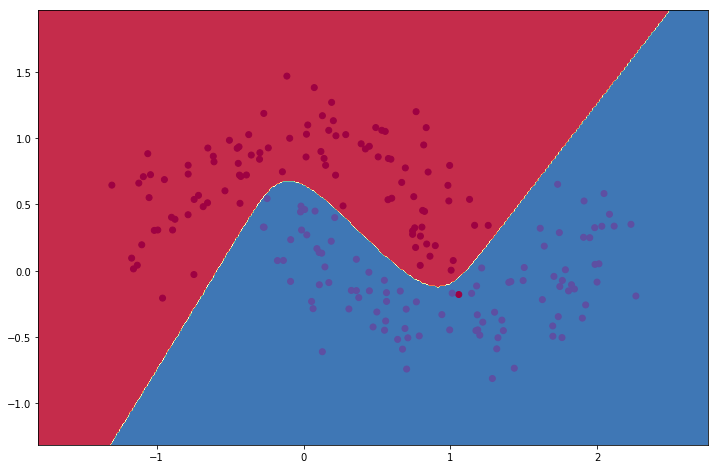

In [83]:
# Helper function to predict an output (0 or 1)
def predict(weights, b, x):
    l1 = activation(np.dot(x, weights[0]) + b[0])
    prob = activation(np.dot(l1, weights[1]) + b[1])
    return prob.round().astype(int)

plot_decision_boundary(lambda x: predict((w0, w1), (b0, b1), x))

---

##  -- Homework --

1. Implement softmax loss (http://cs231n.github.io/neural-networks-case-study/)

1. Try other activation function (tanh, relu)

1. Add regularization 

1. Add dropout (http://cs231n.github.io/neural-networks-2/)


---

## Sources

* [cs231](http://cs231n.github.io/) by Stanford
* [https://mlfromscratch.com/neural-networks-explained](https://mlfromscratch.com/neural-networks-explained)